In [99]:
import pandas as pd
import matplotlib as plt

import warnings
warnings.filterwarnings('ignore')

#get data
from vega_datasets import data

# Exercises

In [100]:
temps = data.sf_temps()

## Use the above dataset for the following exercises:

1. Resample by the day and take the average temperature. Visualize the average temperature over time.
2. Write the code necessary to visualize the minimum temperature over time.
3. Write the code necessary to visualize the maximum temperature over time.
4. Which month is the coldest, on average?
5. Which month has the highest average temperature?
6. Resample by the day and calculate the min and max temp for the day (Hint: .agg(['min', 'max'])). Use this resampled dataframe to calculate the change in temperature for the day. Which month has the highest daily temperature variability?
Bonus: Visualize the daily min, average, and max temperature over time on a single line plot, i.e. the min, average, and maximum temperature should be 3 seperate lines.

In [101]:
#Making date time index
temps = temps.set_index('date').sort_index()
temps.head()

,temp
date,
2010-01-01 00:00:00,47.8
2010-01-01 01:00:00,47.4
2010-01-01 02:00:00,46.9
2010-01-01 03:00:00,46.5
2010-01-01 04:00:00,46.0


In [102]:
#Min and Max
temps.index.min(), temps.index.max()

(Timestamp('2010-01-01 00:00:00'), Timestamp('2010-12-31 23:00:00'))

### 1. Resample by the day and take the average temperature. Visualize the average temperature over time.

<AxesSubplot:xlabel='date'>

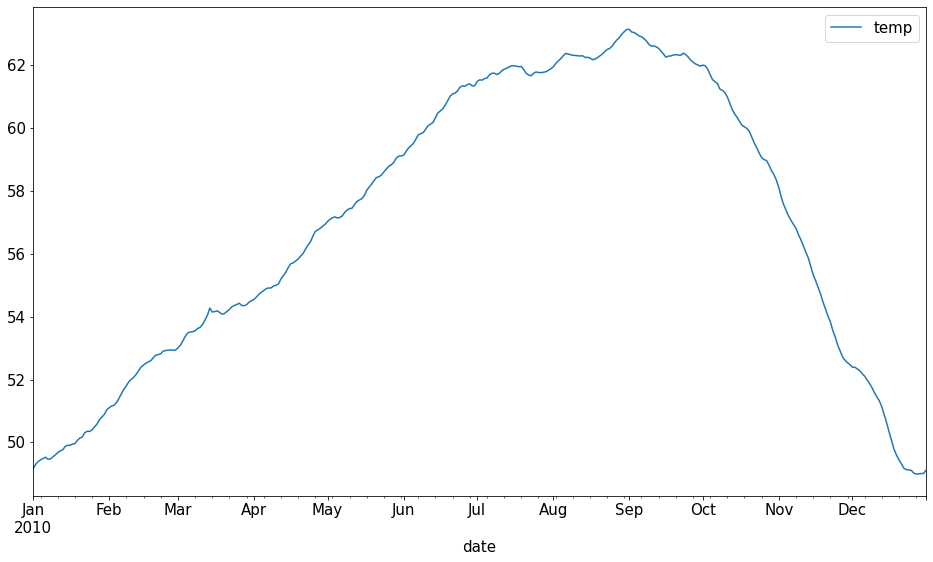

In [103]:
temps.resample('D').mean() # Temperature by day
temps.resample('D').mean().plot(label='Daily')

### 2. Write the code necessary to visualize the minimum temperature over time.

<AxesSubplot:xlabel='date'>

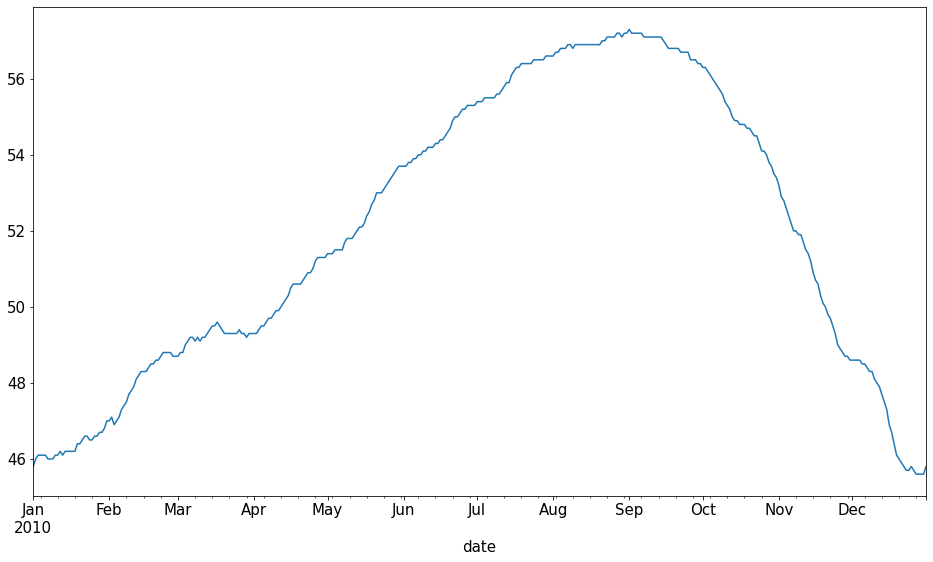

In [156]:
temps.resample('D').temp.min().plot(label='min temp per day')

### 3. Write the code necessary to visualize the maximum temperature over time.

<AxesSubplot:xlabel='date'>

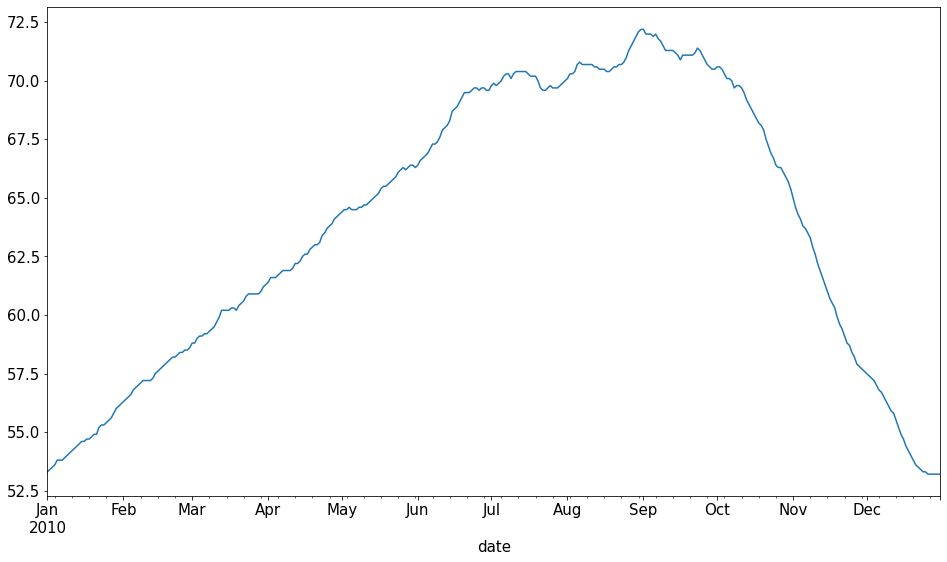

In [157]:
temps.resample('D').max().temp.plot(label='max temp per day')

### 4. Which month is the coldest, on average?

In [160]:
#Class solution
temps.resample('M').temp.mean().idxmin()

Timestamp('2010-01-31 00:00:00', freq='M')

In [110]:
temps['month'] = temps.index.month_name()

In [111]:
temps.head(2)

,temp,month
date,,
2010-01-01 00:00:00,47.8,January
2010-01-01 01:00:00,47.4,January


In [162]:
#January is the coldest month
temps.groupby('month').mean().sort_values('temp').head()

,temp
month,
January,49.984140
December,50.498253
February,52.243899
March,53.956528
November,55.185139


### 5. Which month has the highest average temperature?

In [113]:
#September is the hottest month
temps.groupby('month').mean().sort_values('temp', ascending=False).head()

,temp
month,
September,62.487083
August,62.405376
July,61.765457
June,60.444722
October,60.253091


In [163]:
#Class solution
temps.resample('M').temp.mean().idxmax()

Timestamp('2010-09-30 00:00:00', freq='M')

### 6. Resample by the day and calculate the min and max temp for the day (Hint: .agg(['min', 'max'])). Use this resampled dataframe to calculate the change in temperature for the day. Which month has the highest daily temperature variability? Bonus: Visualize the daily min, average, and max temperature over time on a single line plot, i.e. the min, average, and maximum temperature should be 3 seperate lines.

In [114]:
temps.resample('D').mean()

,temp
date,
2010-01-01,49.170833
2010-01-02,49.304167
2010-01-03,49.391667
2010-01-04,49.445833
2010-01-05,49.491667
...,...
2010-12-27,48.991667
2010-12-28,49.000000
2010-12-29,49.012500


In [115]:
days = temps.resample('D').agg(['min', 'max']).temp
days

,min,max
date,,
2010-01-01,45.8,53.3
2010-01-02,46.0,53.4
2010-01-03,46.1,53.5
2010-01-04,46.1,53.6
2010-01-05,46.1,53.8
...,...,...
2010-12-27,45.6,53.2
2010-12-28,45.6,53.2
2010-12-29,45.6,53.2


In [116]:
#Cannot do the dot function because we are not aggregating by rows
days['temp_diff'] = days['max'] - days['min']
days

,min,max,temp_diff
date,,,
2010-01-01,45.8,53.3,7.5
2010-01-02,46.0,53.4,7.4
2010-01-03,46.1,53.5,7.4
2010-01-04,46.1,53.6,7.5
2010-01-05,46.1,53.8,7.7
...,...,...,...
2010-12-27,45.6,53.2,7.6
2010-12-28,45.6,53.2,7.6
2010-12-29,45.6,53.2,7.6


In [117]:
days['month'] = days.index.month_name()

In [118]:
days.head(2)

,min,max,temp_diff,month
date,,,,
2010-01-01,45.8,53.3,7.5,January
2010-01-02,46.0,53.4,7.4,January


In [120]:
#August has the highest difference in temperatures
days.groupby('month').max().sort_values('temp_diff', ascending=False)

,min,max,temp_diff
month,,,
August,57.2,72.2,15.0
September,57.3,72.2,14.9
July,56.6,70.4,14.8
June,55.3,69.7,14.8
October,56.3,70.6,14.4
May,53.7,66.4,13.1
April,51.3,64.3,13.0
March,49.6,61.3,12.0
November,53.2,65.0,11.8


## Exercises Part 2: Seattle Weather

In [121]:
df = data.seattle_weather()

In [122]:
df.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


### 1. Which year and month combination has the highest amount of precipitation?

In [123]:
#Making date time index
df = df.set_index('date').sort_index()
df.head()

,precipitation,temp_max,temp_min,wind,weather
date,,,,,
2012-01-01,0.0,12.8,5.0,4.7,drizzle
2012-01-02,10.9,10.6,2.8,4.5,rain
2012-01-03,0.8,11.7,7.2,2.3,rain
2012-01-04,20.3,12.2,5.6,4.7,rain
2012-01-05,1.3,8.9,2.8,6.1,rain


In [124]:
df.resample('M').sum().precipitation.idxmax()

Timestamp('2015-12-31 00:00:00', freq='M')

In [164]:
# Class solution with strftime
df.resample('M').precipitation.sum().idxmax().strftime('%B, %Y')

'December, 2015'

### 2. Visualize the amount of monthly precipitation over time

<AxesSubplot:xlabel='date'>

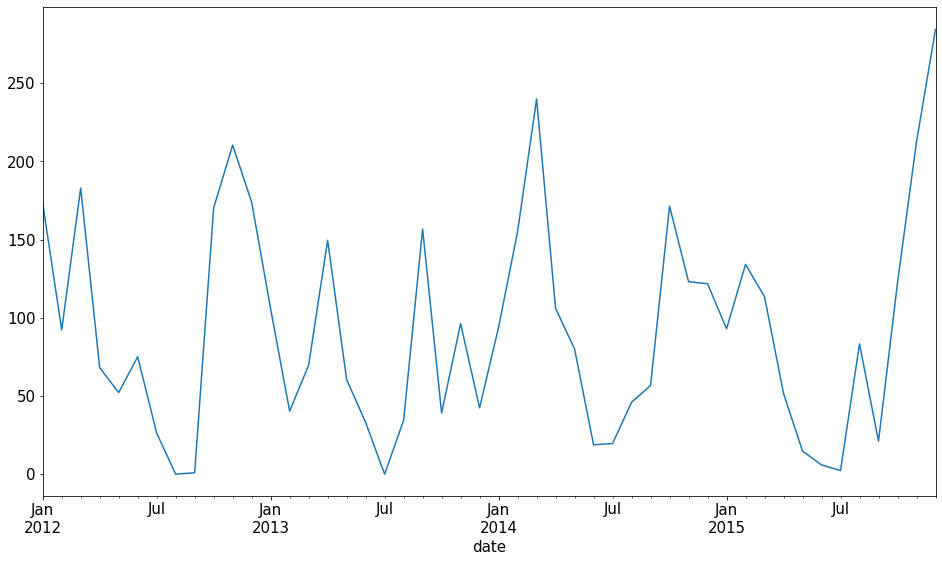

In [127]:
df.resample('M').sum().precipitation.plot()

### 3. Visualize the amount of wind over time. Choose a time interval you think is appropriate.

In [128]:
df.head(2)

,precipitation,temp_max,temp_min,wind,weather
date,,,,,
2012-01-01,0.0,12.8,5.0,4.7,drizzle
2012-01-02,10.9,10.6,2.8,4.5,rain


<AxesSubplot:xlabel='date'>

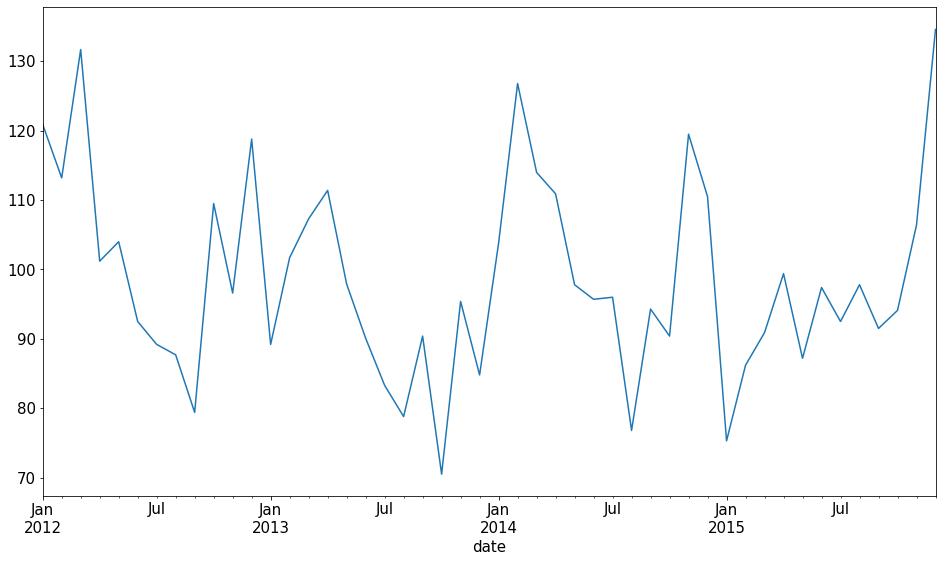

In [167]:
df.resample('M').sum().wind.plot()

### 4. Which year-month combination is the windiest?

In [132]:
df.resample('M').sum().wind.idxmax()

Timestamp('2015-12-31 00:00:00', freq='M')

In [133]:
## December 2015 has the highest wind

### 5. What's the sunniest year? (Hint: which day has the highest number of days where weather == sun?)

In [134]:
df.head(2)

,precipitation,temp_max,temp_min,wind,weather
date,,,,,
2012-01-01,0.0,12.8,5.0,4.7,drizzle
2012-01-02,10.9,10.6,2.8,4.5,rain


In [142]:
df[['weather']][df.weather == 'sun'].resample('Y').count().idxmax()

weather   2014-12-31
dtype: datetime64[ns]

In [143]:
## 2014 is the sunniest year

In [169]:
## Class solution
df.resample('Y').weather.value_counts().idxmax()

(Timestamp('2014-12-31 00:00:00', freq='A-DEC'), 'sun')

### 6. In which month does it rain the most?

In [144]:
df['month'] = df.index.month_name()
df.head(2)

,precipitation,temp_max,temp_min,wind,weather,month
date,,,,,,
2012-01-01,0.0,12.8,5.0,4.7,drizzle,January
2012-01-02,10.9,10.6,2.8,4.5,rain,January


In [146]:
#df.resample('month').precipitation.sum().idxmax()
df['is_rainy'] = df.weather == 'rain'
df.head(2)

,precipitation,temp_max,temp_min,wind,weather,month,is_rainy
date,,,,,,,
2012-01-01,0.0,12.8,5.0,4.7,drizzle,January,False
2012-01-02,10.9,10.6,2.8,4.5,rain,January,True


In [147]:
df.groupby('month').sum().is_rainy.idxmax()

'February'

In [148]:
## February is the rainiest month

In [175]:
## Class solution
rain_by_month = pd.DataFrame(df.resample('M').precipitation.sum())
rain_by_month.head()

,precipitation
date,
2012-01-31,173.3
2012-02-29,92.3
2012-03-31,183.0
2012-04-30,68.1
2012-05-31,52.2


In [185]:
rain_by_month['month'] = rain_by_month.index.strftime('%B')
rain_by_month.head()

,precipitation,month
date,,
2012-01-31,173.3,January
2012-02-29,92.3,February
2012-03-31,183.0,March
2012-04-30,68.1,April
2012-05-31,52.2,May


In [187]:
rain_by_month.groupby('month').precipitation.sum().idxmax()

'November'

### 7. Which month has the most number of days with a non-zero amount of precipitation?

In [149]:
df['some_rain'] = (df.precipitation > 0)

In [150]:
df.head(2)

,precipitation,temp_max,temp_min,wind,weather,month,is_rainy,some_rain
date,,,,,,,,
2012-01-01,0.0,12.8,5.0,4.7,drizzle,January,False,False
2012-01-02,10.9,10.6,2.8,4.5,rain,January,True,True


In [151]:
df.groupby('month').sum().some_rain.idxmax()

'December'

In [152]:
# December has the most number of days with a non-zero amount of precipitation